연속형 데이터
- 실수 데이터 : 픽셀 밝기, 붓꽃 측정값 등

범주형 ( = 이산형 )
- 연속적이지 않은 숫자
- 브랜드, 색상
- 아이템 분류 : 책, 옷, 가방
- 크기, 순서가 없는 데이터가 주를 이룬다.

one-hot-encoding 
- 범주형 변수를 이진특성값으로 변경
- 0 또는 1의 값을 가진 여러개의 새로운 특성으로 바꿈
- 해상 특성을 1로 나머지는 0으로
- (희소행렬의 형태)

In [1]:
from preamble import *
%matplotlib inline
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font",family=font_name)

%load_ext watermark
%watermark -v  -p sklearn,numpy,scipy,matplotlib

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

sklearn   : 0.23.2
numpy     : 1.19.2
scipy     : 1.5.2
matplotlib: 3.3.2



In [2]:
import os # os를 제어

# 데이터를 불러오는 과정
# 현장에서 모아온 데이터들은 너무 dirty해서 눈 뜨고 볼 수 없다고 한다.
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age','workclass','fnlwgt','education','eduucation-num','martial-status','occupation','relationship','race',
          'gender','captial-gain','capital-loss','hours-per-week','native-country','income'])
data = data[['age','workclass','education','gender','hours-per-week','occupation', 'income']]
display(data.head())

# 열의 값 count로 잘못된 데이터를 확인해본다.
# 밑의 코드는 gender값의 개수를 확인해보는 명령어다.
# print(data['gender'].value_counts()) 이런 형태의 코드로 쓸 수도 있었다.
print(data.gender.value_counts())

# 밑의 코드는 age값의 개수를 확인해보는 명령어다.
print(data['age'].value_counts())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


 Male      21790
 Female    10771
Name: gender, dtype: int64
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64


pandas를 가져와서 get_dummies를 이용하면 객체타입이나 범주형을 가진 열을 자동으로 변환해 줄 수 있다.

In [3]:
print("원본 특성:\n", list(data.columns),"\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [4]:
# target값을 빼서 다시 해본다.
features=data_dummies.loc[:,'age':'occupation_ Transport-moving']
#Numpy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values

print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [5]:
# 로지스틱 회귀를 적용
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)
print("테스트 점수(logistic): {:.2f}".format(logreg.score(X_test, y_test)))

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(X_train, y_train)
print("테스트 점수(knn): {:.2f}".format(kn.score(X_test, y_test)))

# 주의사항 : 데이터를 훈련/테스트로 나누기 전에 전체 데이터에 대해서 dummy를 적용

테스트 점수(logistic): 0.81
테스트 점수(knn): 0.77


숫자로 되어 있지만 범주형인 경우도 존재한다.
- ex) workclass를 객관식으로 골랐다면 1,2,3과 같은 숫자로 저장될 것 이다.

In [7]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만들기
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
                       '범주형 특성': ['양말','여우','양말','상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [8]:
# 문자열 특성한 인코딩
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [9]:
#문자열로 바꿔서 더미함수 적용
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)

display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [10]:
# OneHotEncoder : 모든 특징이 범주형이라고 가정하고 변환
from sklearn.preprocessing import OneHotEncoder
#sparse=False로 설정하면 OneHotEncode가 희소 행렬이 아니라 넘파이 배열을 반환합니다.
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [11]:
#sparse=True로 설정하면 OneHotEncode가 희소 행렬을 반환한다.
ohe = OneHotEncoder(sparse=True)
print(ohe.fit_transform(demo_df))

  (0, 0)	1.0
  (0, 4)	1.0
  (1, 1)	1.0
  (1, 5)	1.0
  (2, 2)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (3, 3)	1.0


In [12]:
#괄호안에 아무것도 넣지 않아도 희소행렬을 반환한다.
ohe = OneHotEncoder()
print(ohe.fit_transform(demo_df))

  (0, 0)	1.0
  (0, 4)	1.0
  (1, 1)	1.0
  (1, 5)	1.0
  (2, 2)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (3, 3)	1.0


ColumnTransformer

In [13]:
# 다행히 작동시키면서 오류가 발생하지 않았다.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([("scaling", StandardScaler(), ["age","hours-per-week"]),
                       ("onehot", OneHotEncoder(sparse=False), ['workclass','education','gender','occupation'])])

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#income을 제외한 모든 열을 추출
data_features = data.drop("income", axis=1)
#데이터프레임과 income을 분할
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [15]:
# max_iter를 설정해주지 않으면 테스트점수는 출력이 되지만 경고문구가 뜬다.
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수 : {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수 : 0.81


In [16]:
# ColumnTransformer 안의 단계 접근시 named_transformers_ 속성 사용
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

Make_column_transformer
- 클래스이름을 기반으로 자동으로 각 단계의 이름을 부여해준다.

In [17]:
from sklearn.compose import make_column_transformer

# 이름 자동 지정
ct = make_column_transformer(
(StandardScaler(), ['age','hours-per-week']),
(OneHotEncoder(sparse=False),['workclass','education','gender','occupation']))

# 이름을 직접 지정하고 싶을 때는 아래와 같은 코드 형태를 이용한다. (ColumnTransformer밑에 적혀진 코드들도 이런 방법을 이용한다.)
# ct = ColumnTransformer(
# [("scaling", StandardScaler(), ["age","hours-per-week"]),
# ("onehot", OneHotEncoder(sparse=False), ["workclass","education","gender","occupation"])])

score: 0.63
score: 0.86


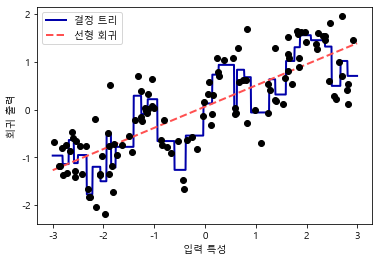

In [18]:
# 센서데이터 같은 것을 받게 되면 데이터가 연속해서 들어오게 된다.
# 이렇게 들어오는 데이터를 구간을 나눠서 사용을 할 수 있게 하는 것을 벡터라이제이션 또는 비닝이라고 한다.

# 샘플 120개(-3 ~ 3)를 구간을 나눠 모델을 만들어보기
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

dreg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, dreg.predict(line), label="결정 트리")

lreg = LinearRegression().fit(X,y)
plt.plot(line, lreg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
print("score: {:.2f}".format(lreg.score(X,y)))
print("score: {:.2f}".format(dreg.score(X,y)))

#밑의 score 차이가 많이 난다.
# 이유 : 선형회귀는 멀리있는 얘들까지 고려해서 에러가 크게 나지만
# 결정트리는 샘플 하나하나를 다 보고 또 특성까지 보기 때문이다. 그래서 결정트리는 오버피트를 조심해야 한다.

구간 분할
연속형 데이터를 구간 데이터로 변경 (binning, 이산화)
연속형 특성 하나를 구간을 나누어 범주형 특성으로 변환

In [19]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

# 원본 특성 출력
print(X[:10])

# one hot encodint 출력
print(X_binned[:10])

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


score: 0.72
score: 0.72


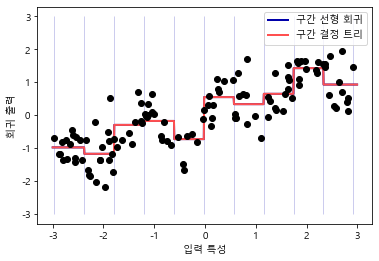

In [20]:
line_binned = kb.transform(line)

lreg = LinearRegression().fit(X_binned, y)
plt.plot(line, lreg.predict(line_binned), label='구간 선형 회귀')

dreg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, dreg.predict(line_binned), label="구간 결정 트리")
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

print("Linear Regression score: {:.2f}".format(lreg.score(X_binned,y)))
print("DecisionTreeRegressor score: {:.2f}".format(dreg.score(X_binned,y)))

# 구간으로 변환하여 one-hot-encoding 후 구간별 에측 값이 상수값
# Score 차이가 없다.
# 결정트리는 특성별로 가장 좋은 구간을 학습하므로 구간 나누기가 별 도움이 되지 않는다.
# 일부특성과 출력이 비선형이면서 용량이 크고, 고차원데이터의 선형모델에 구축시 구간나구기가 유용

(120, 11)
[[-0.753  0.     0.     0.     1.     0.     0.     0.     0.     0.
   0.   ]
 [ 2.704  0.     0.     0.     0.     0.     0.     0.     0.     0.
   1.   ]
 [ 1.392  0.     0.     0.     0.     0.     0.     0.     1.     0.
   0.   ]
 [ 0.592  0.     0.     0.     0.     0.     0.     1.     0.     0.
   0.   ]
 [-2.064  0.     1.     0.     0.     0.     0.     0.     0.     0.
   0.   ]]


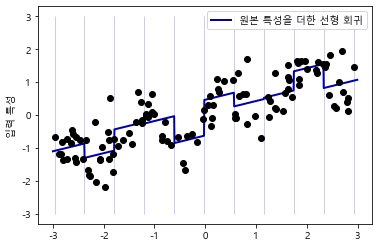

In [39]:
# 기존 데이터를 이용하여 feature를 추가함으로써 데이터의 특성을 강화시킨다.
# 구간으로 나눈 Wave data에 원본 특성을 추가 : 11개의 특성
# 입력특성이 하나라서 구간의 기울기가 같다
# X축 사이의 상호작용 특성을 추가
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
print(X_combined[:5])

reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label="원본 특성을 더한 선형 회귀")

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.ylabel("입력 특성")
plt.plot(X[:,0], y, 'o', c='k')

(120, 20)


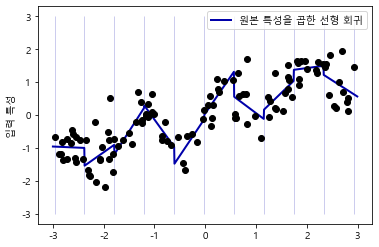

In [41]:
# 구간 데이터
# 구간과 원본 특성을 곱한 값을 추가(20개 특성)
# 구간별 기울기, 절편이 다르다
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label="원본 특성을 곱한 선형 회귀")

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.ylabel("회귀 출력")
plt.ylabel("입력 특성")
plt.plot(X[:,0], y, 'o', c='k')
plt.legend(loc="best")

In [47]:
# 다항식 추가

# 연속형 특성을 확장
# - 구간 나누기, 원본 추가, 원본과의 곱 추가, 다항식 추가

from sklearn.preprocessing import PolynomialFeatures

#x **10까지 고차항을 추가한다.
#기본값인 "include_biaTrue"는 절편에 해당하는 1인 특성을 추가한다.
poly = PolynomialFeatures(degree=10, include_bias=False)

poly.fit(X)

X_poly = poly.transform(X) #X_poly.shape: (120, 10)

print("X_poly.shape:", X_poly.shape)

print("X 원소:\n", X[:5])
print("X_poly 원소:\n", X_poly[:5])
print("항 이름:\n", poly.get_feature_names())

X_poly.shape: (120, 10)
X 원소:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
X_poly 원소:
 [[   -0.753     0.567    -0.427     0.321    -0.242     0.182    -0.137
      0.103    -0.078     0.058]
 [    2.704     7.313    19.777    53.482   144.632   391.125  1057.714
   2860.36   7735.232 20918.278]
 [    1.392     1.938     2.697     3.754     5.226     7.274    10.125
     14.094    19.618    27.307]
 [    0.592     0.35      0.207     0.123     0.073     0.043     0.025
      0.015     0.009     0.005]
 [   -2.064     4.26     -8.791    18.144   -37.448    77.289  -159.516
    329.222  -679.478  1402.367]]
항 이름:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


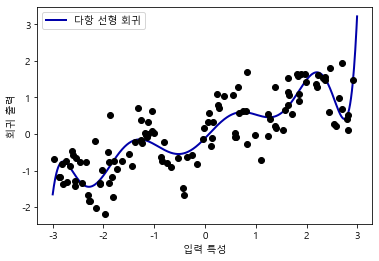

In [52]:
# 다항식을 이용한 선형회귀
# 첫번째 열은 원본, 다른열은 거듭제곱
# 데이터가 부족한 부분에서 민감한 결과
# - 시작과 끝부분에서 급격하게 내려가거나 상승

reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

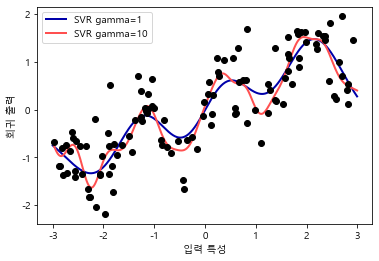

In [55]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

# gamma : 커널 폭의 역수
# - 작은 값 : 넓은 커널 영역, 많은 포인트 고려
# - 큰 값 : 각 포인트에 민김(빨간색)

In [66]:
# 보스톤 주택가격
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 다항식으로 특성 변환
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape:", X_train.shape)
print("X_train_poly.shape:", X_train_poly.shape)
print("다항 특성 이름:\n", poly.get_feature_names())

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)
다항 특성 이름:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [71]:
# Ridge / RandomForestRegressor 비교
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)

print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)

print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


일변량 비선형변환
대부분의 모델이 데이터가 정규분포일 떄 좋은 성능
비선형이거나 정규분포가 아닌 경우 좋지 않은 성능

Log, exp, sin 함수를 적용한 특성 변환

Log 변환
- 정규성을 높여 분석의 성능 높이기 위해
- 큰 수를 같은 비율의 작은 수로 바꾸어 준다
- 로그에  의해 곱하기가 더하기로, 나누기가 빼기로

선형/신경망 모델 : 데이터 스케일과 분포에 민감
- 특성과 타깃사이의 비선형성이 있다면 선형회귀 모델 수립이 어려움
- Log/exp는 데이터 스케일 변경으로 도움

In [79]:
rnd = np.random.RandomState(0)
X_org = rnd.normal (size=(1000, 3)) # normal dist. 데이터 1000 by 3
w = rnd.normal (size=3) # w = [ 1.593 0.569 -0.114]
X = rnd.poisson (10 * np.exp(X_org)) # 포아송 분포데이터 생성
y = np.dot( X_org , w) #원데이터와 w 로 y 값 생성

print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


특성 출현 횟수:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

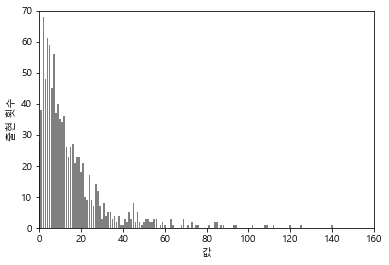

In [82]:
print("특성 출현 횟수:\n{}".format(np.bincount(X[:,0].astype('int'))))

plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

# 2번 68이 가장 빈도수가 높다
# 큰 값이 있다
# 포아송 분포
# 작은수치는 많고 큰 값은 적다

In [83]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score=Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score)) # R^2값 : 비선형관계

테스트 점수: 0.622


로그 변환
- 단위가 다른 특징이 섞여 있을 때 큰 단위를 작은 단위로 변환하여 왜곡을 줄인다
- 독립변수 종속변수의 변화의 절대량이 아닌 비율 을 보기 위해
- 비선형 관계를 선형 관계로

테스트 점수: 0.875


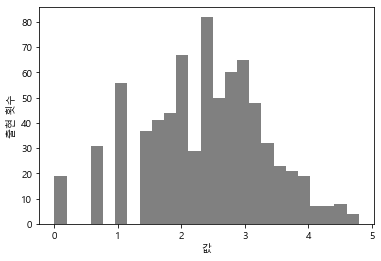

In [87]:
X_train_log = np.log(X_train + 1) #0 값은 log 적용이 안되므로+1
X_test_log = np.log(X_test + 1)

# 분포가 덜 치우치며 큰 값의 이상치가 보이지 않음

plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")

score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))

In [97]:
#SelectPercentile
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생시킨다
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성을 추가합니다.
# 처음 30개는 원본 특성이고 다음 50개는 노이즈입니다.
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
X_w_noise, cancer.target, random_state=0, test_size=.5)

#f_classif 기본값 와 SelectPercentile 을 사용하여 특성의 50% 를 선택
select = SelectPercentile(score_func=f_classif , percentile=50)
select.fit(X_train, y_train)
# 훈련 세트에 적용합니다.
X_train_selected = select.transform(X_train)

print("X_train.shape", X_train.shape)
print("X_train_selected.shape", X_train_selected.shape)

X_train.shape (284, 80)
X_train_selected.shape (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


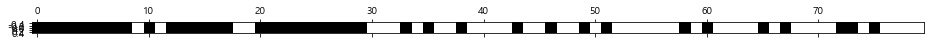

In [99]:
mask = select.get_support()
print(mask)

# True는 검은색, False는 흰색으로 마스킹합니다.
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [111]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(
lr.score(X_test_selected,y_test)))

#  밑에처럼 경고문구가 발생했지만 점수값은 문제 없이 잘 출력되었다.

전체 특성을 사용한 점수: 0.930
선택된 일부 특성을 사용한 점수: 0.937


C:\Users\NoteBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\NoteBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [119]:
#모델기반 특징 선택
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
RandomForestClassifier(n_estimators=100, random_state=42),threshold="median") #특징 선택의 임계:값 특징 중요도의 중간값
# 트리 100개로 특징 선택
# 일변량 분석보다 강력, 복잡한 모델
select.fit(X_train, y_train) # Cancer data, 원본 특징 30개
X_train_l1 = select.transform(X_train)
print("X_train.shape", X_train.shape)
print("X_train_l1.shape", X_train_l1.shape)

X_train.shape (284, 80)
X_train_l1.shape (284, 40)


Text(0.5, 0, '특성 번호')

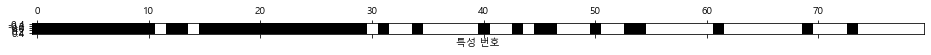

In [120]:
#선택된 특성 표시
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

In [128]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("향상된 테스트 점수: {:.3f}".format(score)) #성능 향상

향상된 테스트 점수: 0.947


Text(0.5, 0, '특성 번호')

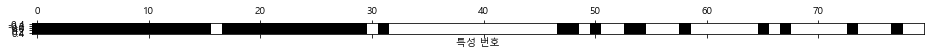

In [132]:
# 반복적 특징 선택
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)
# 선택된 특성을 표시합니다.
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

In [144]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression (max_iter=5000).fit(X_train_rfe , y_train ).score(X_test_rfe , y_test)
print("테스트 점수 : {:.3f}".format(select.score(X_test , y_test)))

테스트 점수 : 0.951


시티 바이크 데이터:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, '대여횟수')

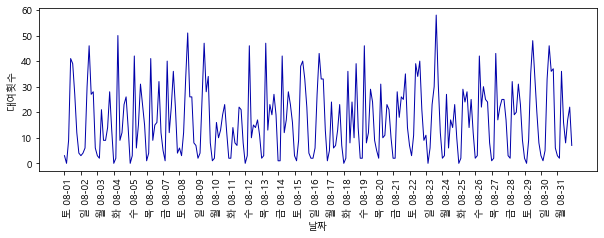

In [153]:
# 전문가 지식활용
# citibike
Citibike = mglearn.datasets.load_citibike()
print("시티 바이크 데이터:\n{}".format(Citibike.head()))

plt.figure(figsize=(10,3))
xticks = pd.date_range(start=Citibike.index.min(), end=Citibike.index.max(), freq='D')
week = ["일","월","화","수","목","금","토"]
xticks_name = [week[int(w)]+d for w, d in  zip(xticks.strftime("%w"), xticks.strftime(" %m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha="left")
plt.plot(Citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

테스트 세트 R^2: -0.04


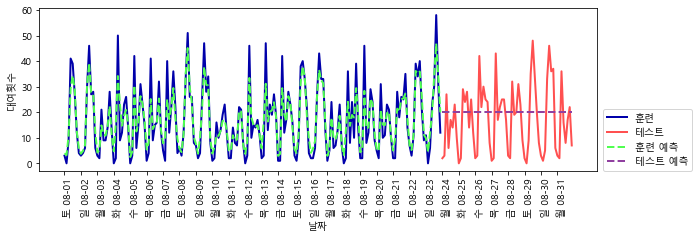

In [165]:
# 타깃값 추출 (대여 횟수)
y = Citibike.values
# POSIzx 시간을 10**9로 나누어 변환
X = Citibike.index.astype("int64").values.reshape(-1, 1) # 10**9

# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용합니다.
n_train = 184

# 주어진 특성을 사용하여 평가하고 그래프를 만듭니다.
def eval_on_features(features, target, regressor):
    # 훈련 세트와 테스트 세트로 나눈다.
    X_train, X_test = features[:n_train], features[n_train:]
    # 타깃값도 나눈다.
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,3))
    
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")
    
    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="테스트")
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="테스트 예측")
    
    plt.legend(loc=(1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")
    
from sklearn.ensemble import RandomForestRegressor

# POSIX 시간만 사용하여 만든  랜덤 포레스트의 예측
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

테스트 세트 R^2: 0.60


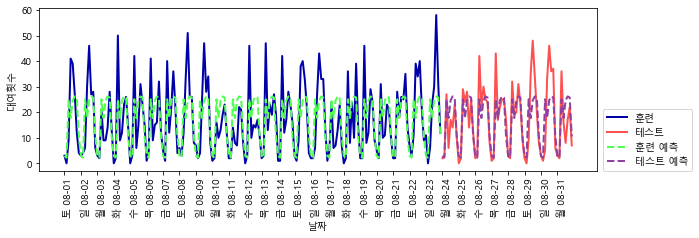

In [167]:
#시간만 사용하여 만든 랜덤포레스트의 예측
X_hour = Citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

테스트 세트 R^2: 0.84


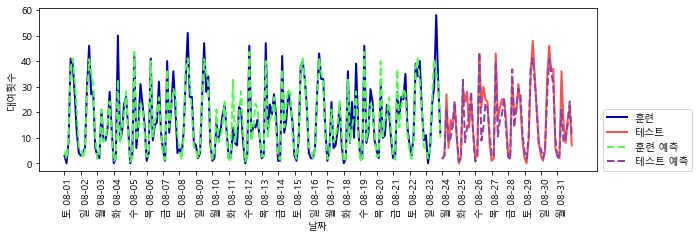

In [169]:
# 시간과 요일 특성을 사용해 만든 랜덤 포레스트의 예측
X_hour_week = np.hstack([Citibike.index.dayofweek.values.reshape(-1, 1), Citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

테스트 세트 R^2: 0.13


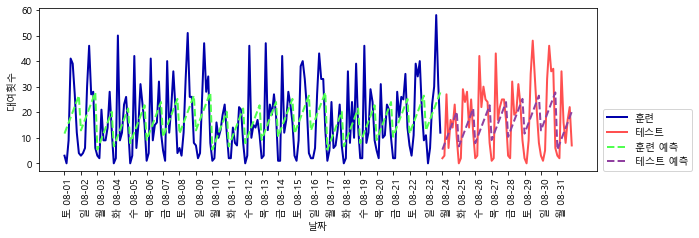

In [170]:
# 시간과 요일 특성을 사용하여 만든 선형 회귀의 예측
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

테스트 세트 R^2: 0.62


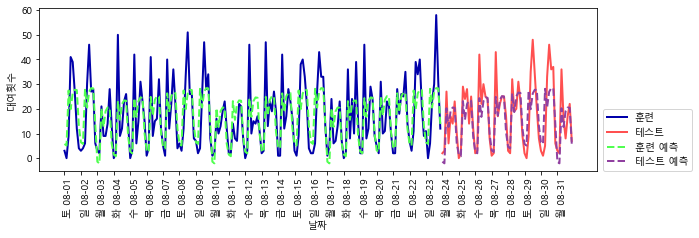

In [173]:
# 시간과 요일의 원-핫 인코딩을 사용해 만든 선형회귀의 예측
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 R^2: 0.85


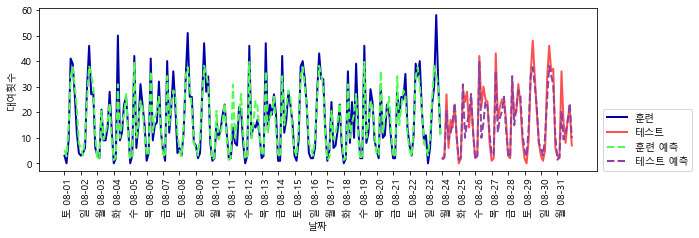

In [177]:
# 시간과 요일의 곱을 특성으로 사용해서 만든 선형회귀의 예측
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

Text(0, 0.5, '계수 크기')

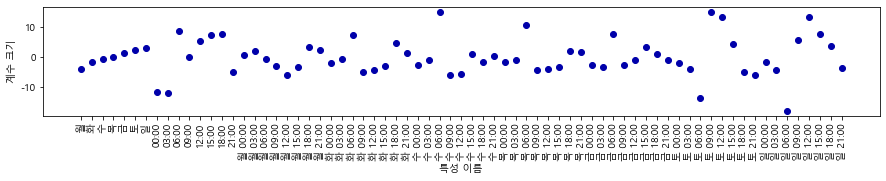

In [186]:
# 시간과 요일의 곱을 사용한 선형 모델의 개수
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features = day + hour

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

plt.figure(figsize=(15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")